In [1]:
pip install yfinance


In [11]:
pip install --upgrade torch

In [12]:
!pip install neuralprophet

  Using cached torch-1.13.1-cp310-cp310-manylinux1_x86_64.whl (887.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchvision 0.16.2 requires torch==2.1.2, but you have torch 1.13.1 which is incompatible.


  Using cached torch-2.1.0-cp310-cp310-manylinux1_x86_64.whl (670.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.6.2 requires torch<2.0.0,>=1.13.1, but you have torch 2.1.0 which is incompatible.


In [4]:
from neuralprophet import NeuralProphet
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
stock='appl'
start_date='2015-01-01'
end_date= '2023-12-20'
stock_data= yf.download(stock, start=start_date, end=end_date)
print(stock_data)
stock_data.to_csv('stock_data.csv')

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['APPL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2015-01-01 -> 2023-12-20)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


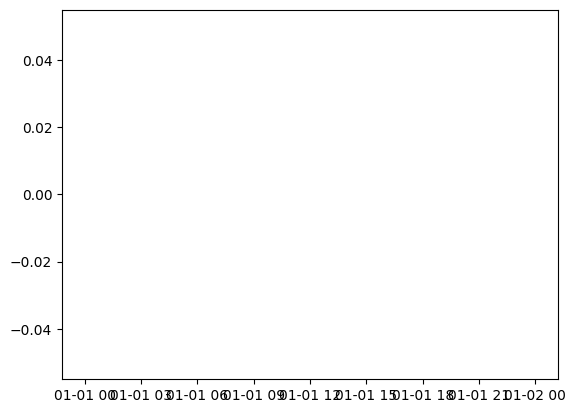

In [6]:
stocks=pd.read_csv('stock_data.csv')
stocks['Date']=pd.to_datetime(stocks['Date'])
stocks=stocks[['Date', 'Close']]
stocks.columns = ['ds', 'y']
plt.plot(stocks['ds'], stocks['y'], label='actual', c='g')
plt.show()

In [7]:
model=NeuralProphet()
model.fit(stocks)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.


ValueError: ignored

In [ ]:
future = model.make_future_dataframe(stocks, period=300)
forecast = model.predict(future)
actual_prediction= model.predict(stocks)

plt.plot(actual_prediction['ds'], actual_prediction['yhat1'], label='future_prediction', c='r')
plt.plot(forecast['ds'], forecast['yhat1'], label='future_prediction', c='b')
plt.plot(stocks['ds'], stocks['y'], label='actual', c='g')

plt.show()

In [ ]:
model.plot_components(forecast)